<h3>Your Choice of Data Processing App


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
df=pd.read_csv('/Users/elahehbeheshti/desktop/Fall2024/realstate.csv')

print(df)

                  street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   pr

In [66]:
df.columns


Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [67]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


1.Create a grid of scatter plots with each one representing the sq_ft distribution in a single zipcode,

please also include ticks, labels and legend in your plot

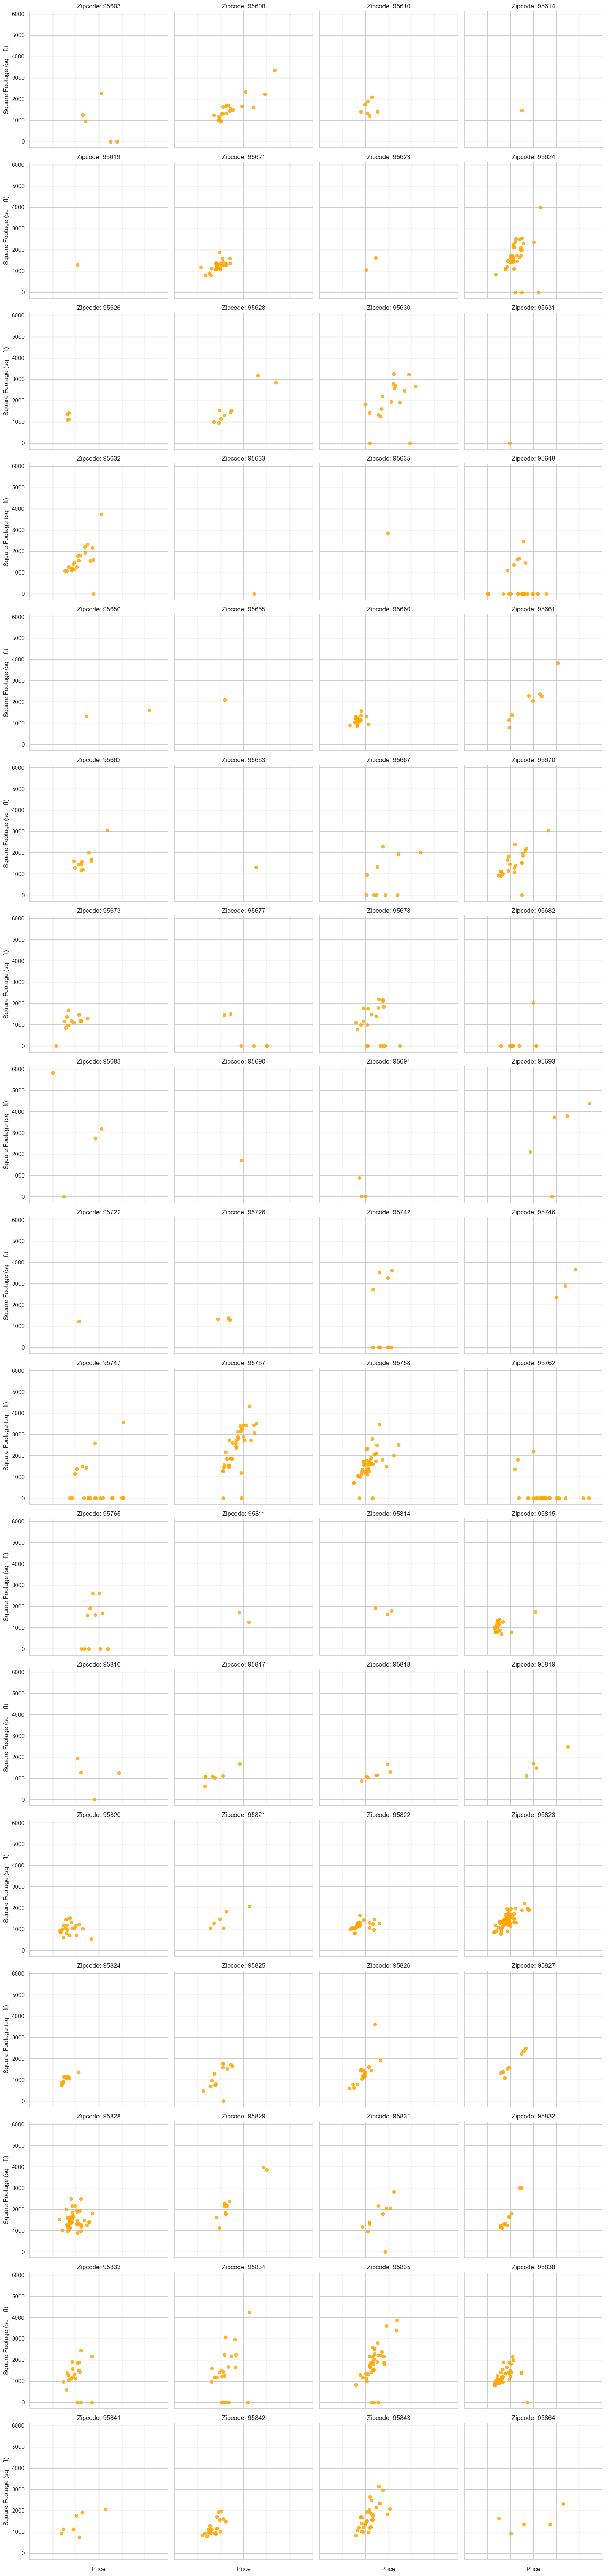

In [87]:

# Create a grid of scatter plots for sq_ft distribution across zip codes
g = sns.FacetGrid(df, col="zip", col_wrap=4, height=4)
g = g.map(plt.scatter, "price", "sq__ft", alpha=0.8,color="orange")

# Adding ticks, labels, and legends
g.set_axis_labels("Price", "Square Footage (sq__ft)")
g.add_legend()
g.set_titles("Zipcode: {col_name}")
g.set_xticklabels(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()




Create a grid of scatter plots with each one representing the price distribution in a single zipcode,

annotate the highest and lowest price ones for each category of real estate: condo, residential and

multi-family, please also include ticks, labels and legend in your plot

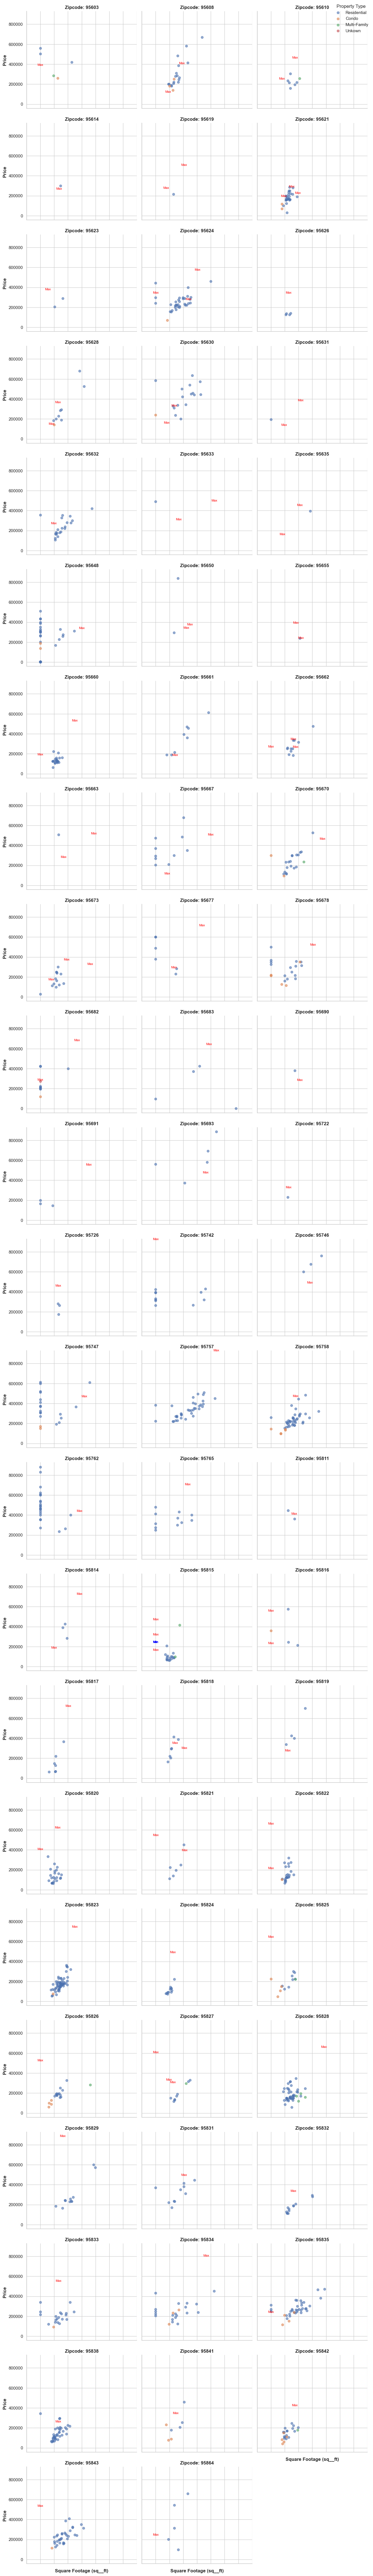

In [90]:
# Find the max and min prices for each category of real estate type in each zipcode
max_prices = df.groupby(['zip', 'type'])['price'].idxmax()
min_prices = df.groupby(['zip', 'type'])['price'].idxmin()

# Set a beautiful seaborn style and color palette
sns.set(style="whitegrid")  # White grid background
palette = sns.color_palette("coolwarm", as_cmap=True)  # Use a cool-warm color palette

# Create a grid of scatter plots for price distribution across zip codes
g = sns.FacetGrid(df, col="zip", col_wrap=3, height=4, hue="type")

# Use the color map with larger markers and clearer transparency
g = g.map(plt.scatter, "sq__ft", "price", alpha=0.6)

# Annotate the highest and lowest points for each category
for idx in max_prices:
    max_row = df.loc[idx]
    g.axes.flat[df['zip'].unique().tolist().index(max_row['zip'])].annotate(
        'Max', (max_row['sq__ft'], max_row['price']), 
        textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red'
    )

for idx in min_prices:
    min_row = df.loc[min_idx]
    g.axes.flat[df['zip'].unique().tolist().index(min_row['zip'])].annotate(
        'Min', (min_row['sq__ft'], min_row['price']), 
        textcoords="offset points", xytext=(0,-10), ha='center', fontsize=8, color='blue'
    )

# Adding ticks, labels, and legends
g.set_axis_labels("Square Footage (sq__ft)", "Price", fontweight='bold') 

# Position the legend in the top right
g.add_legend(title="Property Type", bbox_to_anchor=(1, 1), loc="upper right")

g.set_titles("Zipcode: {col_name}", fontweight='bold')
g.set_xticklabels(rotation=45, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()






Create a grid of bar plots with each one representing a single zipcode and in that zipcode the

sq_ft distribution is grouped by the category of condo, residential and multi-family, please also

include ticks, labels and legend in your plot

/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: Fu

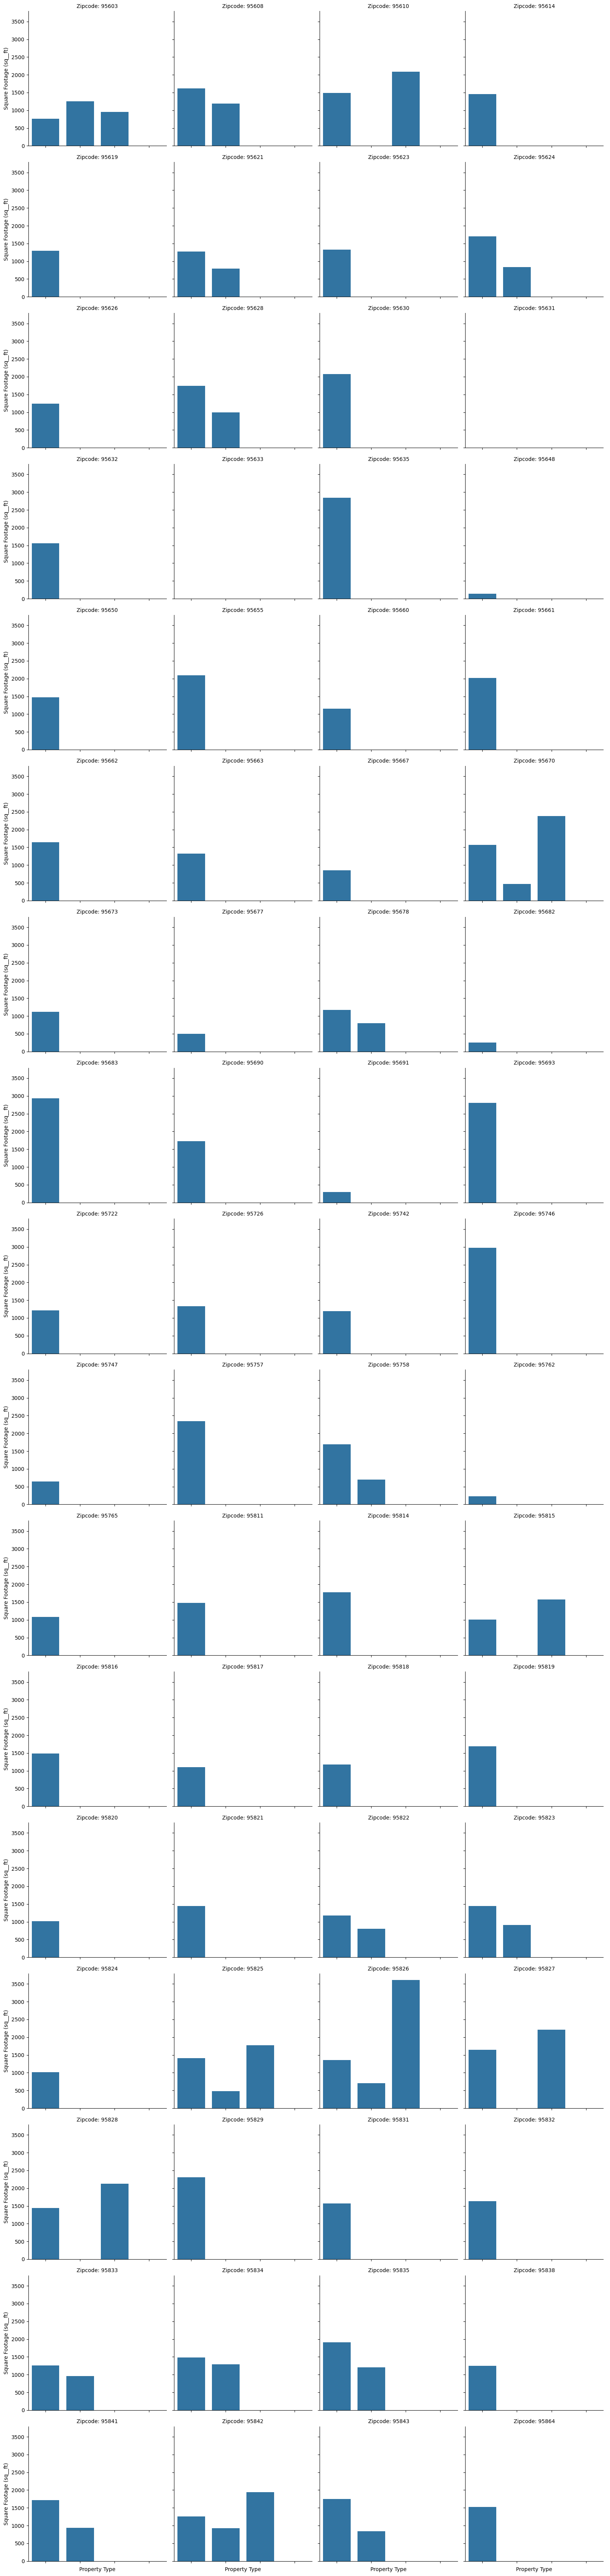

In [47]:

# Create a grid of bar plots for sq_ft distribution grouped by property type ('type') across zip codes
g = sns.FacetGrid(df, col="zip", col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x="type", y="sq__ft", ci=None)

# Adding ticks, labels, and legends
g.set_axis_labels("Property Type", "Square Footage (sq__ft)")
g.add_legend()
g.set_titles("Zipcode: {col_name}")
g.set_xticklabels(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



Create a grid of bar plots with each one representing a single zipcode and in that zipcode the

price distribution is grouped by the category of condo, residential and multi-family, please also

include ticks, labels and legend in your plot

/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: Fu

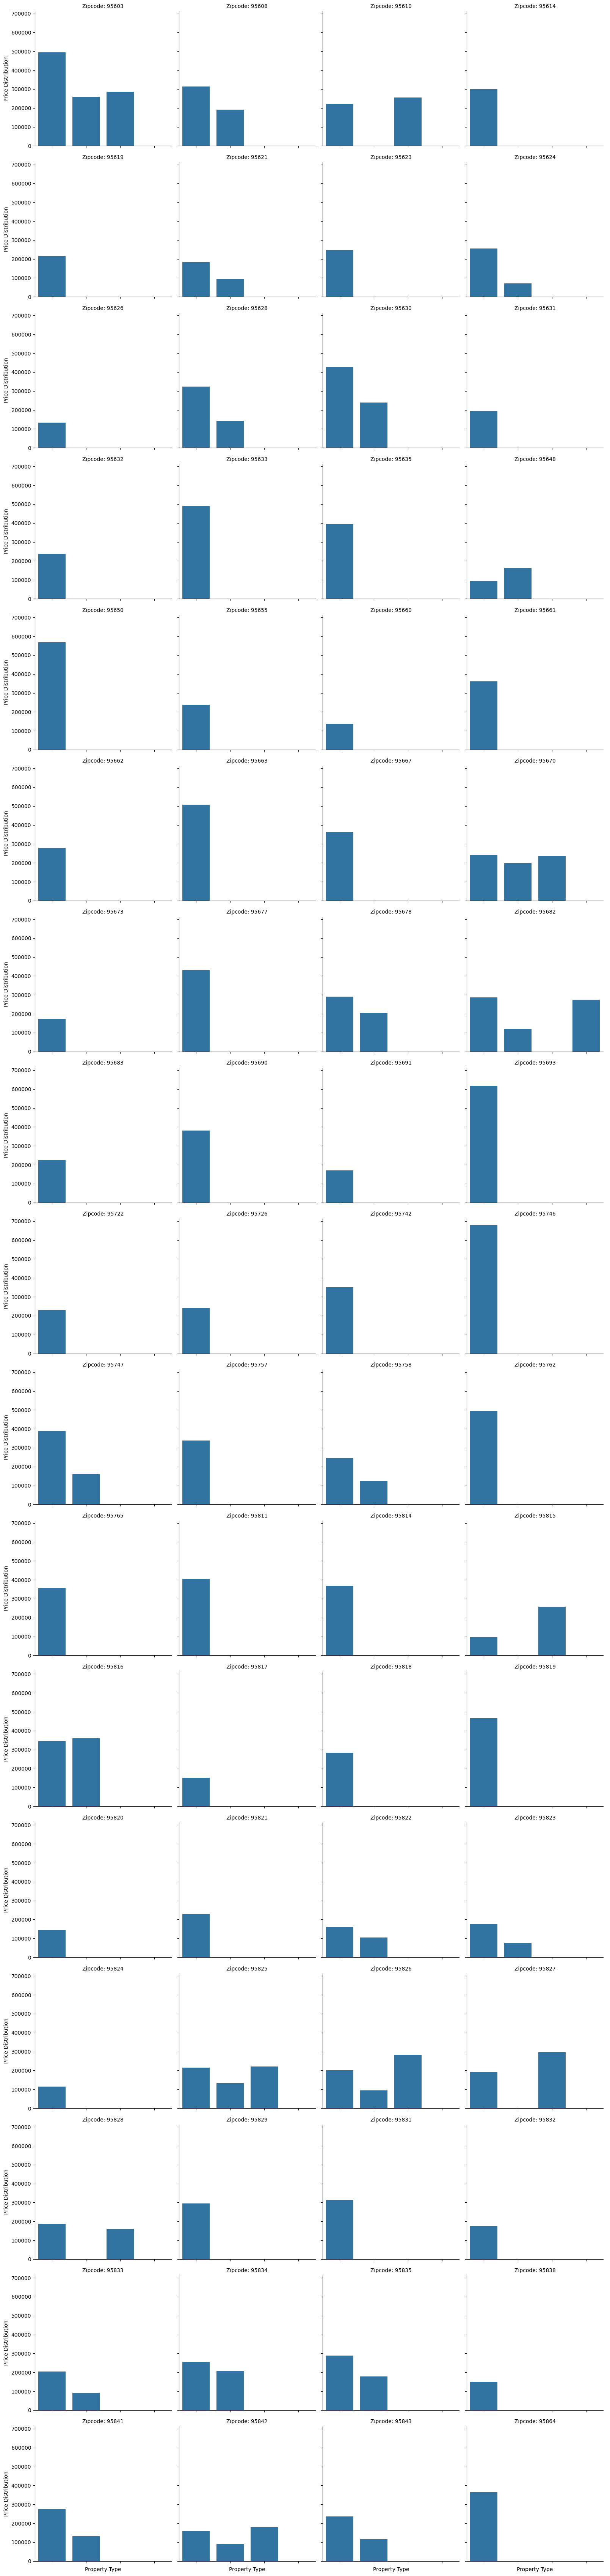

In [48]:


# Create a grid of bar plots for price distribution grouped by property type ('type') across zip codes
g = sns.FacetGrid(df, col="zip", col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x="type", y="price", ci=None)

# Adding ticks, labels, and legends
g.set_axis_labels("Property Type", "Price Distribution")
g.add_legend()
g.set_titles("Zipcode: {col_name}")
g.set_xticklabels(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


Plot the average price distribution based on zipcode for each category of real estate: condo,

residential and multi-family, please also include ticks, labels and legend in your plot

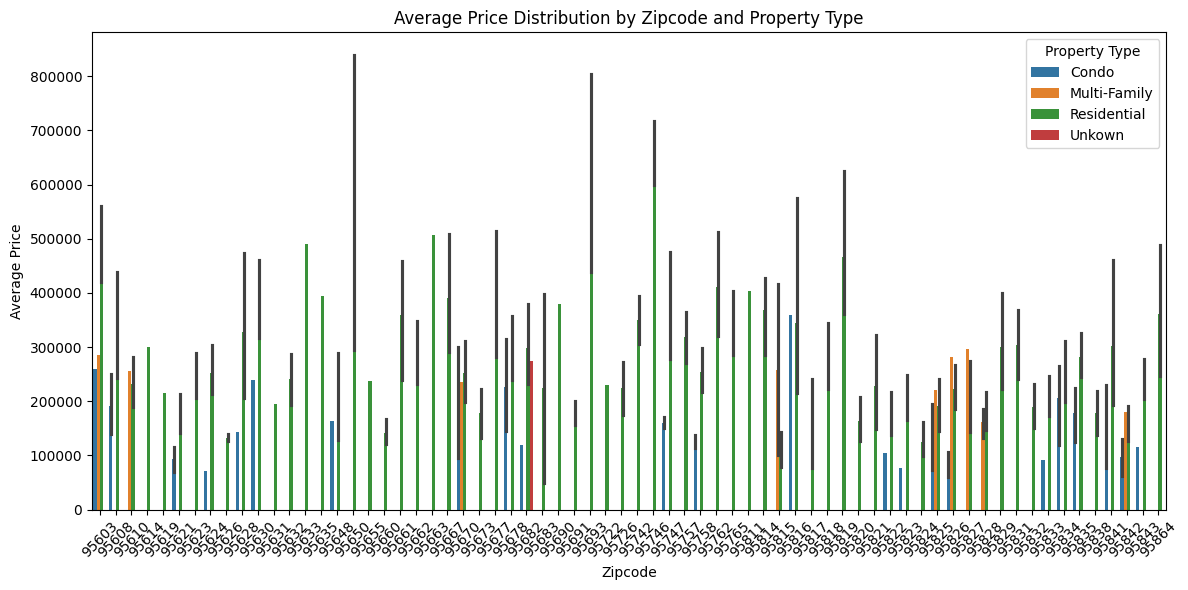

In [56]:

# Divide the dataset into 20 sections by creating a new 'section' column
df['section'] = np.floor(np.arange(len(df)) / (len(df) / 20))

# Group by zip, type, and section to get the average price
average_price_by_zip = df.groupby(['zip', 'type', 'section'])['price'].mean().reset_index()

# Create a bar plot of average price distribution based on zipcode for each category of real estate
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_zip, x='zip', y='price', hue='type')

# Adding ticks, labels, and legends
plt.xlabel('Zipcode')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Zipcode and Property Type')
plt.xticks(rotation=45)
plt.legend(title="Property Type")

# Display the plot
plt.tight_layout()
plt.show()

Plot the average price distribution based on city for each category of real estate: condo,

residential and multi-family, please also include ticks, labels and legend in your plot

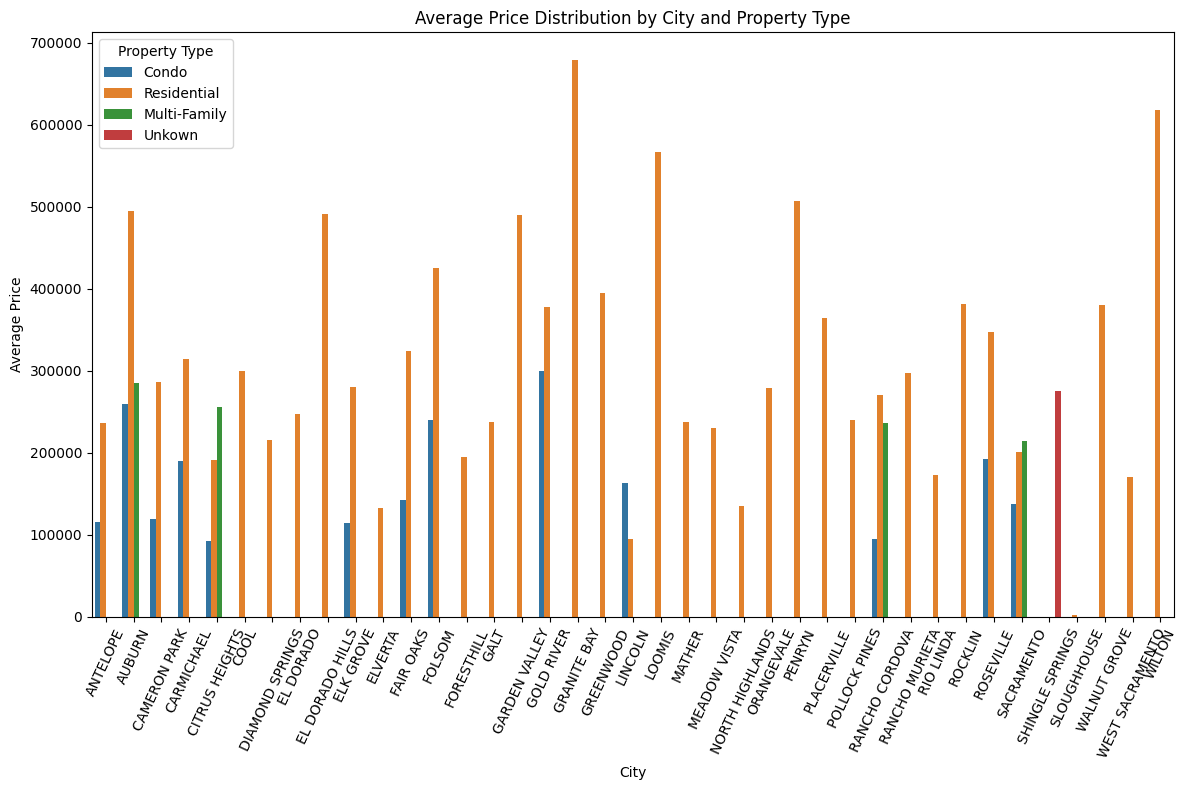

In [61]:
# Group by city and type to get the average price
average_price_by_city = df.groupby(['city', 'type'])['price'].mean().reset_index()

# Create a bar plot of average price distribution based on city for each category of real estate
plt.figure(figsize=(12, 8))
sns.barplot(data=average_price_by_city, x='city', y='price', hue='type')

# Adding ticks, labels, and legends
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by City and Property Type')
plt.xticks(rotation=65)
plt.legend(title="Property Type")

# Display the plot
plt.tight_layout()
plt.show()


In [19]:
df=pd.read_csv('/Users/elahehbeheshti/desktop/Fall2024/SP500.csv')

print(df)

             Date         Open         High          Low        Close  \
0      1950-01-03    16.660000    16.660000    16.660000    16.660000   
1      1950-01-04    16.850000    16.850000    16.850000    16.850000   
2      1950-01-05    16.930000    16.930000    16.930000    16.930000   
3      1950-01-06    16.980000    16.980000    16.980000    16.980000   
4      1950-01-09    17.080000    17.080000    17.080000    17.080000   
...           ...          ...          ...          ...          ...   
17186  2018-04-23  2675.399902  2682.860107  2657.989990  2670.290039   
17187  2018-04-24  2680.800049  2683.550049  2617.320068  2634.560059   
17188  2018-04-25  2634.919922  2645.300049  2612.669922  2639.399902   
17189  2018-04-26  2651.649902  2676.479980  2647.159912  2666.939941   
17190  2018-04-27  2675.469971  2677.350098  2659.010010  2669.909912   

         Adj Close      Volume  
0        16.660000     1260000  
1        16.850000     1890000  
2        16.930000     2

Plot daily gain/loss for January of 2018, annotate the highest daily gain and its date, the highest

daily loss and its date in January 2018

In [20]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [91]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for January 2018
jan_2018 = df[(df['Date'].dt.year == 2018) & (df['Date'].dt.month == 1)]

# Calculate the daily gain/loss (Close price difference)
jan_2018['Daily Change'] = jan_2018['Close'].diff()

# Identify the highest daily gain and loss
max_gain = jan_2018.loc[jan_2018['Daily Change'].idxmax()]
max_loss = jan_2018.loc[jan_2018['Daily Change'].idxmin()]

# Plot the daily gain/loss
plt.figure(figsize=(10, 6))
plt.plot(jan_2018['Date'], jan_2018['Daily Change'], marker='o', linestyle='-', label='Daily Change')

# Annotate the highest gain
plt.annotate(f"Max Gain\n{max_gain['Date'].strftime('%Y-%m-%d')}\n{max_gain['Daily Change']:.2f}", 
             xy=(max_gain['Date'], max_gain['Daily Change']), 
             xytext=(max_gain['Date'], max_gain['Daily Change'] + 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Annotate the highest loss
plt.annotate(f"Max Loss\n{max_loss['Date'].strftime('%Y-%m-%d')}\n{max_loss['Daily Change']:.2f}", 
             xy=(max_loss['Date'], max_loss['Daily Change']), 
             xytext=(max_loss['Date'], max_loss['Daily Change'] - 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Daily Change (Gain/Loss)')
plt.title('Daily Gain/Loss for January 2018')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


KeyError: 'Date'

Make pair plot matrix of January 2018 SP500 data on high, low, adj close and volumn

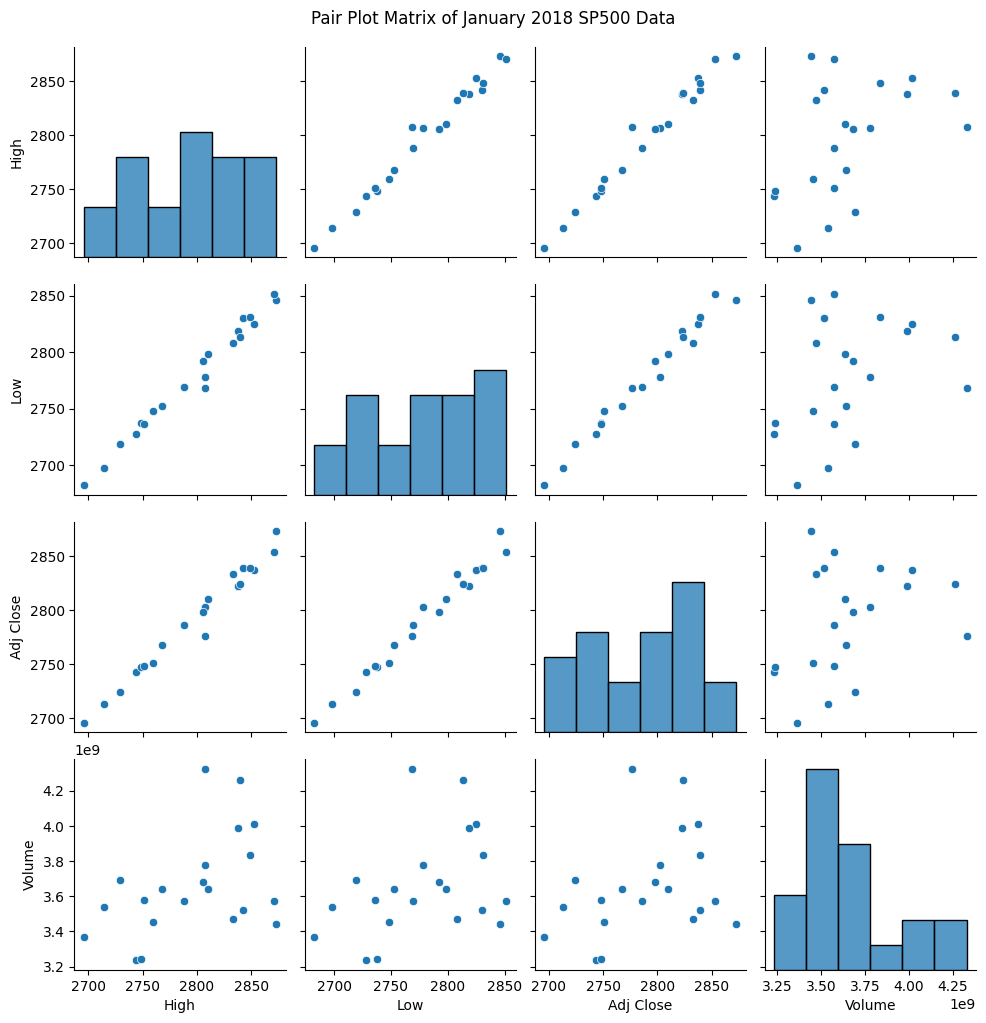

In [22]:


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for January 2018
jan_2018_sp500 = df[(df['Date'].dt.year == 2018) & (df['Date'].dt.month == 1)]

# Select the columns for High, Low, Adj Close, and Volume
selected_columns = jan_2018_sp500[['High', 'Low', 'Adj Close', 'Volume']]

# Create a pair plot matrix using seaborn
sns.pairplot(selected_columns)

# Add title and display the plot
plt.suptitle('Pair Plot Matrix of January 2018 SP500 Data', y=1.02)
plt.show()
